In [28]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("merged_data/merged.csv")
print(df.describe())

             month         year        budget      runtime       screens  \
count  6920.000000  7201.000000  3.480000e+03  6496.000000   5303.000000   
mean      6.646387  2012.165810  4.589011e+07   108.724600   1525.826325   
std       3.501114     5.778384  4.996156e+07    24.724696   1508.024728   
min       1.000000  1998.000000  6.500000e+04     8.000000      1.000000   
25%       4.000000  2008.000000  1.300000e+07    95.000000     20.000000   
50%       7.000000  2013.000000  2.900000e+07   106.000000   1408.000000   
75%      10.000000  2016.000000  6.000000e+07   119.000000   2887.500000   
max      12.000000  2024.000000  4.000000e+08  1179.000000  27879.000000   

       opening_week  domestic_box_office  international_box_office  \
count  5.234000e+03         5.406000e+03              6.714000e+03   
mean   1.186864e+07         3.942422e+07              5.244676e+07   
std    2.256593e+07         7.150953e+07              1.135120e+08   
min    1.100000e+01         2.45000

In [30]:
df.head(5)

,movie_name,month,year,mpaa,budget,runtime,screens,opening_week,domestic_box_office,international_box_office,worldwide_box_office,country
0,'71,2.0,2015.0,R,NaN,99.0,121.0,55761.0,1270847.0,1791331.0,3062178.0,NaN
1,(500) Days of Summer,9.0,2009.0,PG-13,7500000.0,95.0,27.0,834501.0,32425665.0,2089638.0,34515303.0,United States
2,10 Cloverfield Lane,3.0,2016.0,PG-13,15000000.0,103.0,3427.0,24727437.0,72082999.0,38134000.0,110216998.0,United States
3,10 giorni senza mamma,2.0,2019.0,NaN,NaN,94.0,NaN,NaN,NaN,8304981.0,8304981.0,Italy
4,"10,000 B.C.",3.0,2008.0,PG-13,105000000.0,109.0,3410.0,35867488.0,94784201.0,174281477.0,269065678.0,United States


In [31]:
df.isnull().sum()


movie_name                     0
month                        281
year                           0
mpaa                        2029
budget                      3721
runtime                      705
screens                     1898
opening_week                1967
domestic_box_office         1795
international_box_office     487
worldwide_box_office         134
country                     1129
dtype: int64

In [32]:
df.dropna(inplace=True)


In [33]:
row_count = df.shape[0]
print(row_count)


3045


In [34]:
df=df[df['mpaa']!='Not']
row_count = df.shape[0]
print(row_count)

2997


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 1 to 7199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                2997 non-null   object 
 1   month                     2997 non-null   float64
 2   year                      2997 non-null   float64
 3   mpaa                      2997 non-null   object 
 4   budget                    2997 non-null   float64
 5   runtime                   2997 non-null   float64
 6   screens                   2997 non-null   float64
 7   opening_week              2997 non-null   float64
 8   domestic_box_office       2997 non-null   float64
 9   international_box_office  2997 non-null   float64
 10  worldwide_box_office      2997 non-null   float64
 11  country                   2997 non-null   object 
dtypes: float64(9), object(3)
memory usage: 304.4+ KB
None


In [36]:
features_numerical = (
    df.select_dtypes(exclude=["object"]).copy()
)

In [37]:
features_numerical.columns

Index(['month', 'year', 'budget', 'runtime', 'screens', 'opening_week',
       'domestic_box_office', 'international_box_office',
       'worldwide_box_office'],
      dtype='object')

In [38]:
features_categorical = df.select_dtypes(include=["object"]).copy()
features_categorical.columns

Index(['movie_name', 'mpaa', 'country'], dtype='object')

In [39]:
features_numerical = features_numerical.drop("domestic_box_office", axis=1)
features_numerical = features_numerical.drop("worldwide_box_office", axis=1)
features_numerical = features_numerical.drop("international_box_office", axis=1)

C:\Users\Nam\AppData\Local\Temp\ipykernel_33280\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
d:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Nam\AppData\Local\Temp\ipykernel_33280\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your co

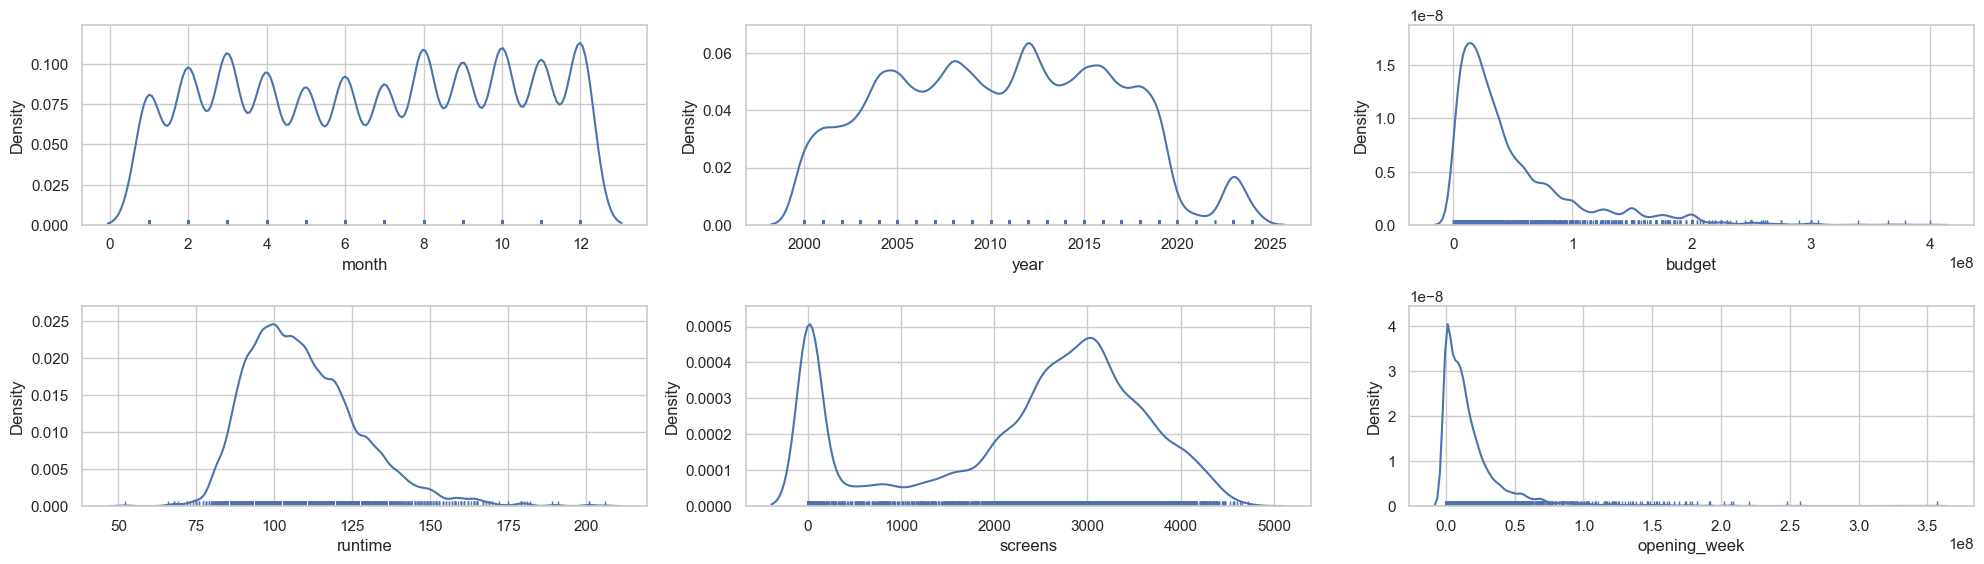

In [40]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 3, i + 1)
    sns.distplot(
        features_numerical.iloc[:, i].dropna(),
        rug=True,
        hist=False,
        kde_kws={"bw": 0.1},
        color="b",
    )
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

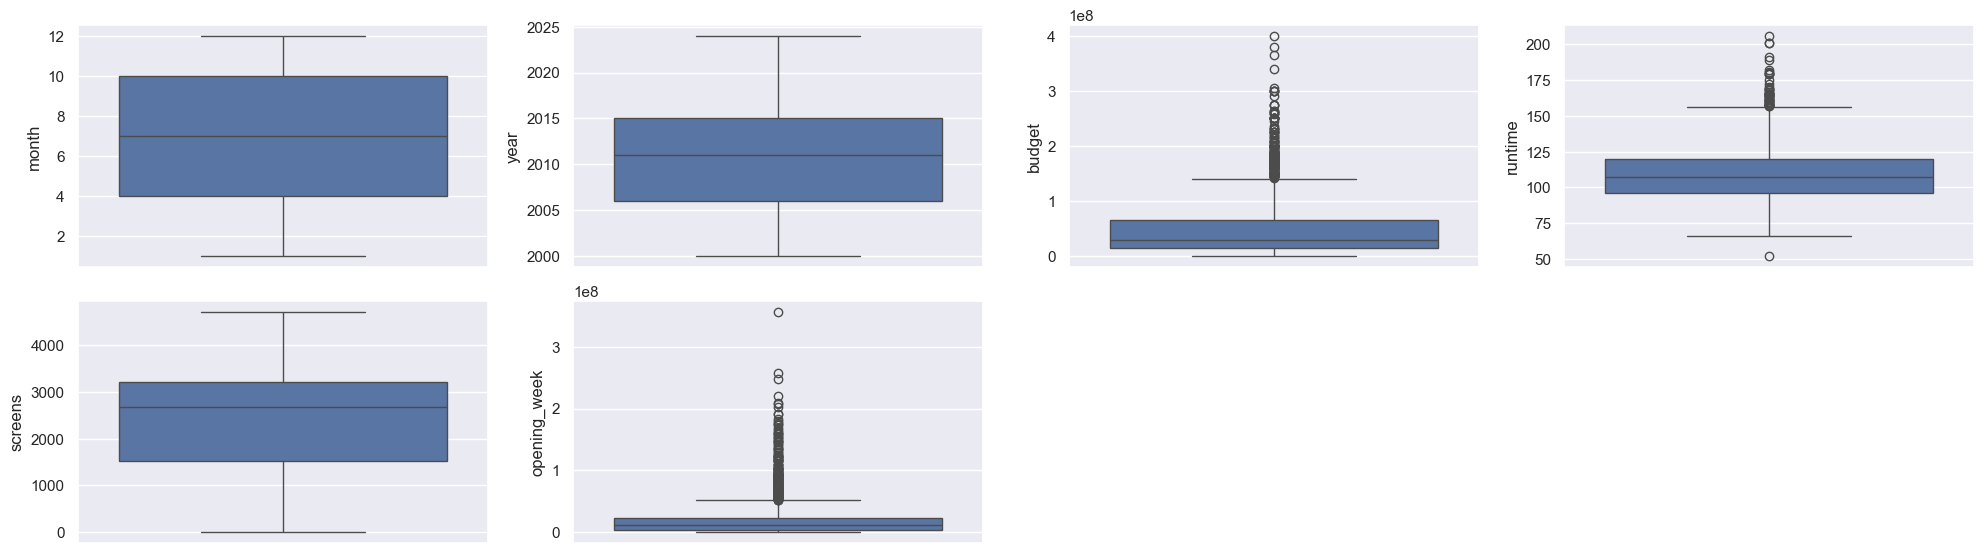

In [41]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="darkgrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical.iloc[:, i].dropna())
plt.tight_layout()

In [42]:
outliers = df[["budget","runtime","screens","opening_week"]]

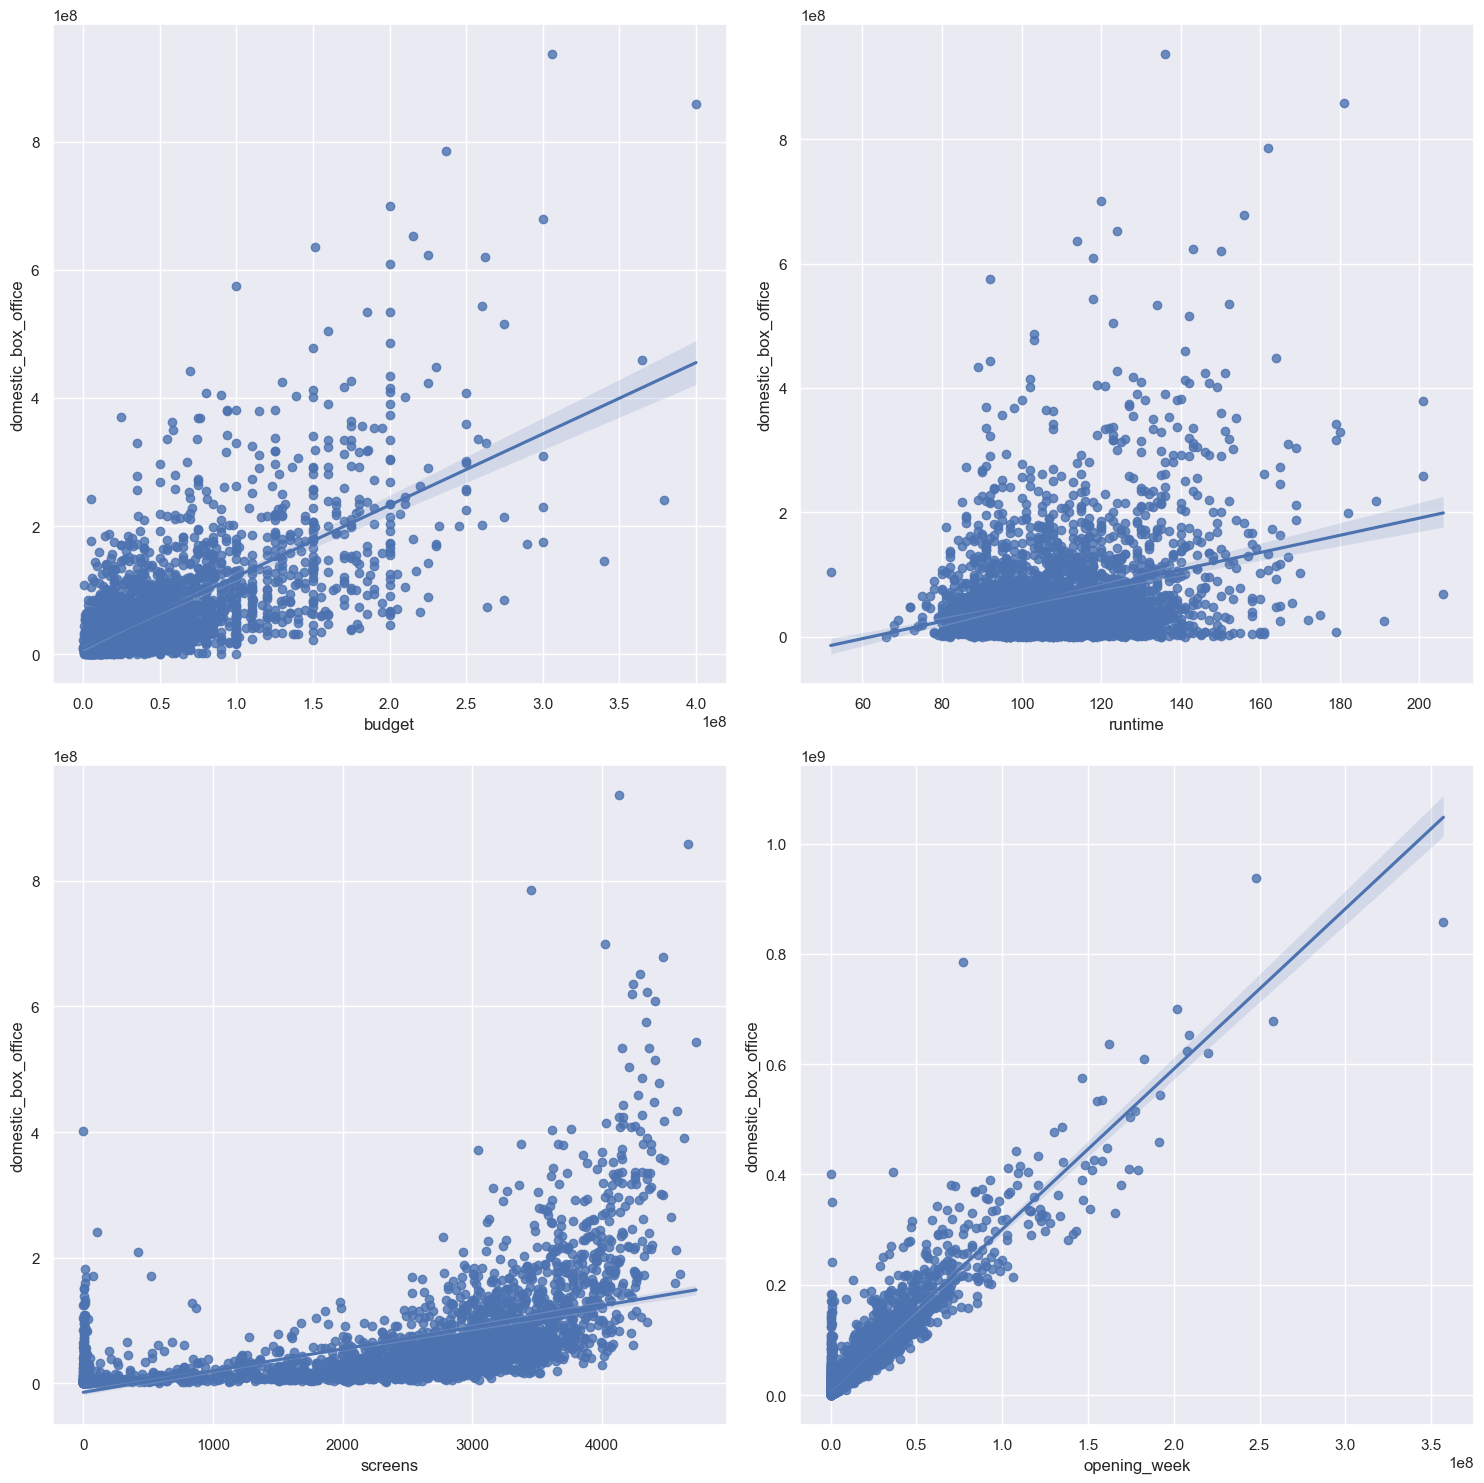

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(outliers.columns):
        sns.regplot(x=outliers.iloc[:, i], y=df.domestic_box_office, ax=ax)

plt.tight_layout()
plt.show()

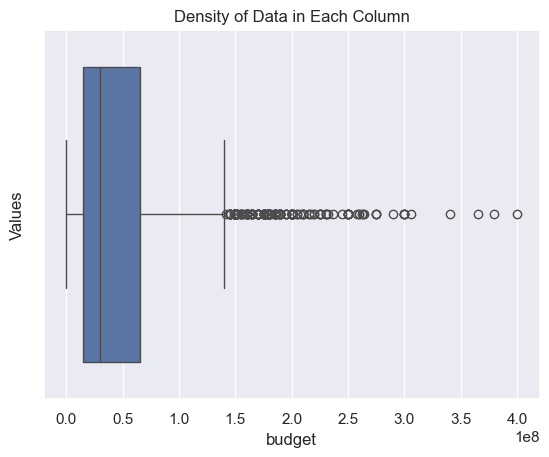

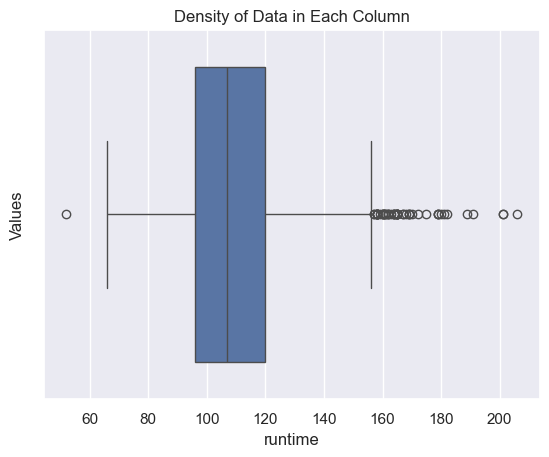

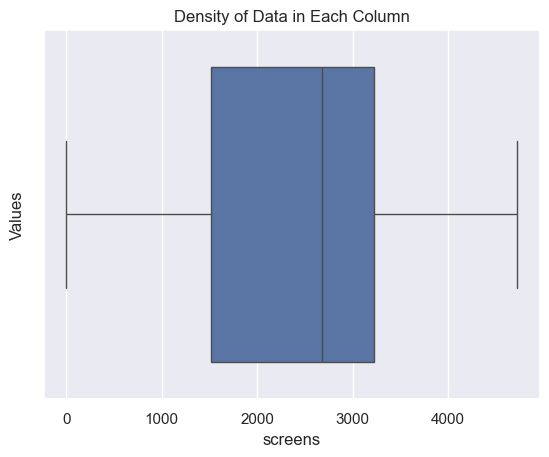

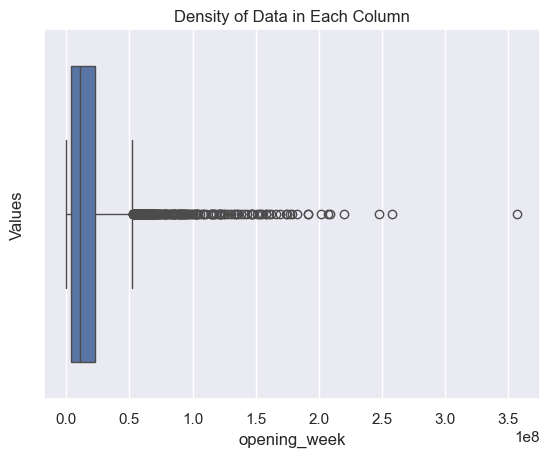

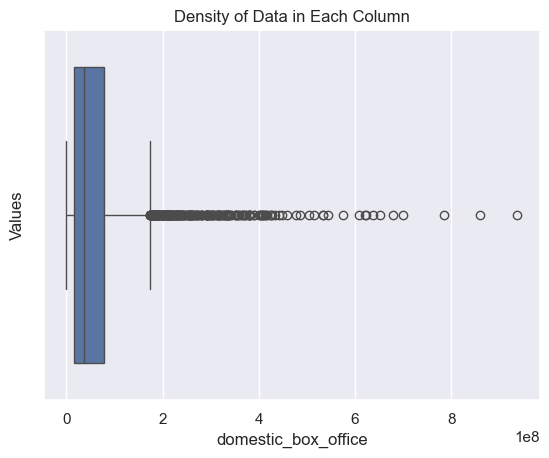

In [44]:


columns = ['budget', 'runtime', 'screens', 'opening_week', 'domestic_box_office']

for column in columns:
    sns.boxplot(x=column, data=df)
    plt.title('Density of Data in Each Column')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


2009.0
Number of movie:  157
2016.0
Number of movie:  171
2008.0
Number of movie:  181
2018.0
Number of movie:  149
2013.0
Number of movie:  146
2010.0
Number of movie:  138
2004.0
Number of movie:  164
2007.0
Number of movie:  142
2001.0
Number of movie:  104
2006.0
Number of movie:  135
2020.0
Number of movie:  16
2003.0
Number of movie:  112
2005.0
Number of movie:  164
2017.0
Number of movie:  138
2019.0
Number of movie:  134
2012.0
Number of movie:  214
2014.0
Number of movie:  143
2011.0
Number of movie:  132
2002.0
Number of movie:  101
2023.0
Number of movie:  69
2015.0
Number of movie:  166
2022.0
Number of movie:  4
2021.0
Number of movie:  11


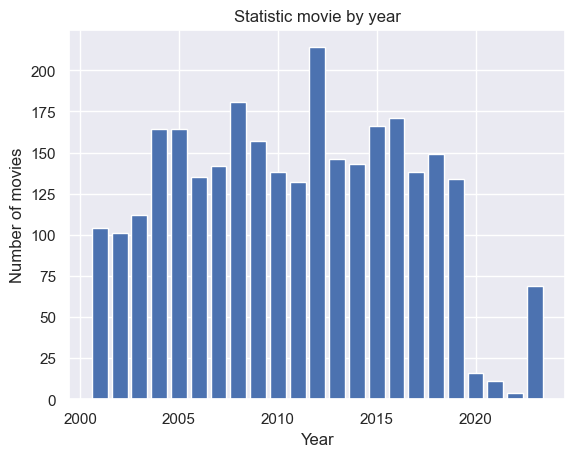

In [45]:
df = df[(df["year"] >= 2001) & (df["year"] <= 2023)]
years=df['year'].unique()
number_movie = []
for y in years:
    print(y)
    print("Number of movie: ",df[df["year"] == y]["movie_name"].count())
    number_movie.append(df[df['year']==y]['movie_name'].count())
plt.bar(years, number_movie)
plt.title("Statistic movie by year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

worldwide_box_office
(0.0, 100000000.0]             1751
(100000000.0, 200000000.0]      522
(200000000.0, 300000000.0]      219
(300000000.0, 400000000.0]      128
(400000000.0, 500000000.0]       73
(500000000.0, 600000000.0]       44
(600000000.0, 700000000.0]       38
(700000000.0, 800000000.0]       32
(800000000.0, 900000000.0]       25
(900000000.0, 1000000000.0]      14
Name: count, dtype: int64


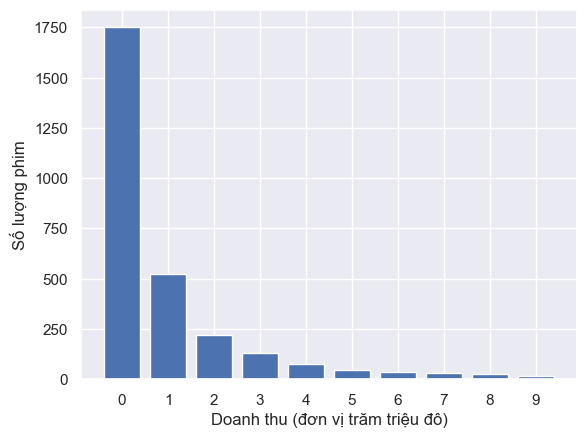

In [46]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter


bins = [
    0,
    1e8,
    2e8,
    3e8,
    4e8,
    5e8,
    6e8,
    7e8,
    8e8,
    9e8,
    10e8
]  

categories = pd.cut(df["worldwide_box_office"], bins)

revenue_counts = categories.value_counts()

print(revenue_counts)

plt.bar([str(cat) for cat in revenue_counts.index], revenue_counts)

plt.xlabel("Doanh thu (đơn vị trăm triệu đô)")
plt.ylabel("Số lượng phim")

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

plt.show()

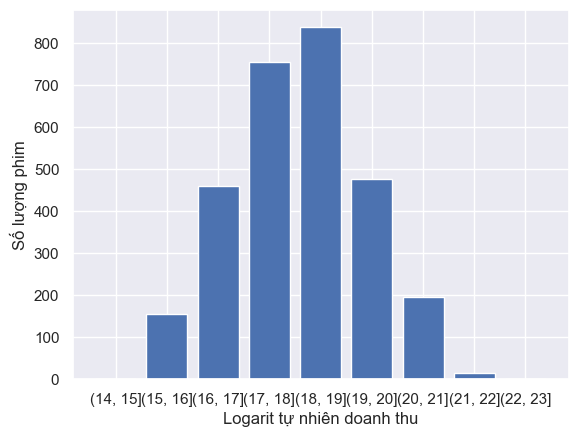

In [51]:
df["log_revenue"] = np.log(df["worldwide_box_office"])

log_bins = [
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
]  

log_categories = pd.cut(df["log_revenue"], log_bins)

log_revenue_counts = log_categories.value_counts()
log_revenue_counts = log_revenue_counts.sort_index()

plt.bar([str(cat) for cat in log_revenue_counts.index], log_revenue_counts)

plt.xlabel("Logarit tự nhiên doanh thu")
plt.ylabel("Số lượng phim")

plt.show()

<Figure size 1000x800 with 0 Axes>

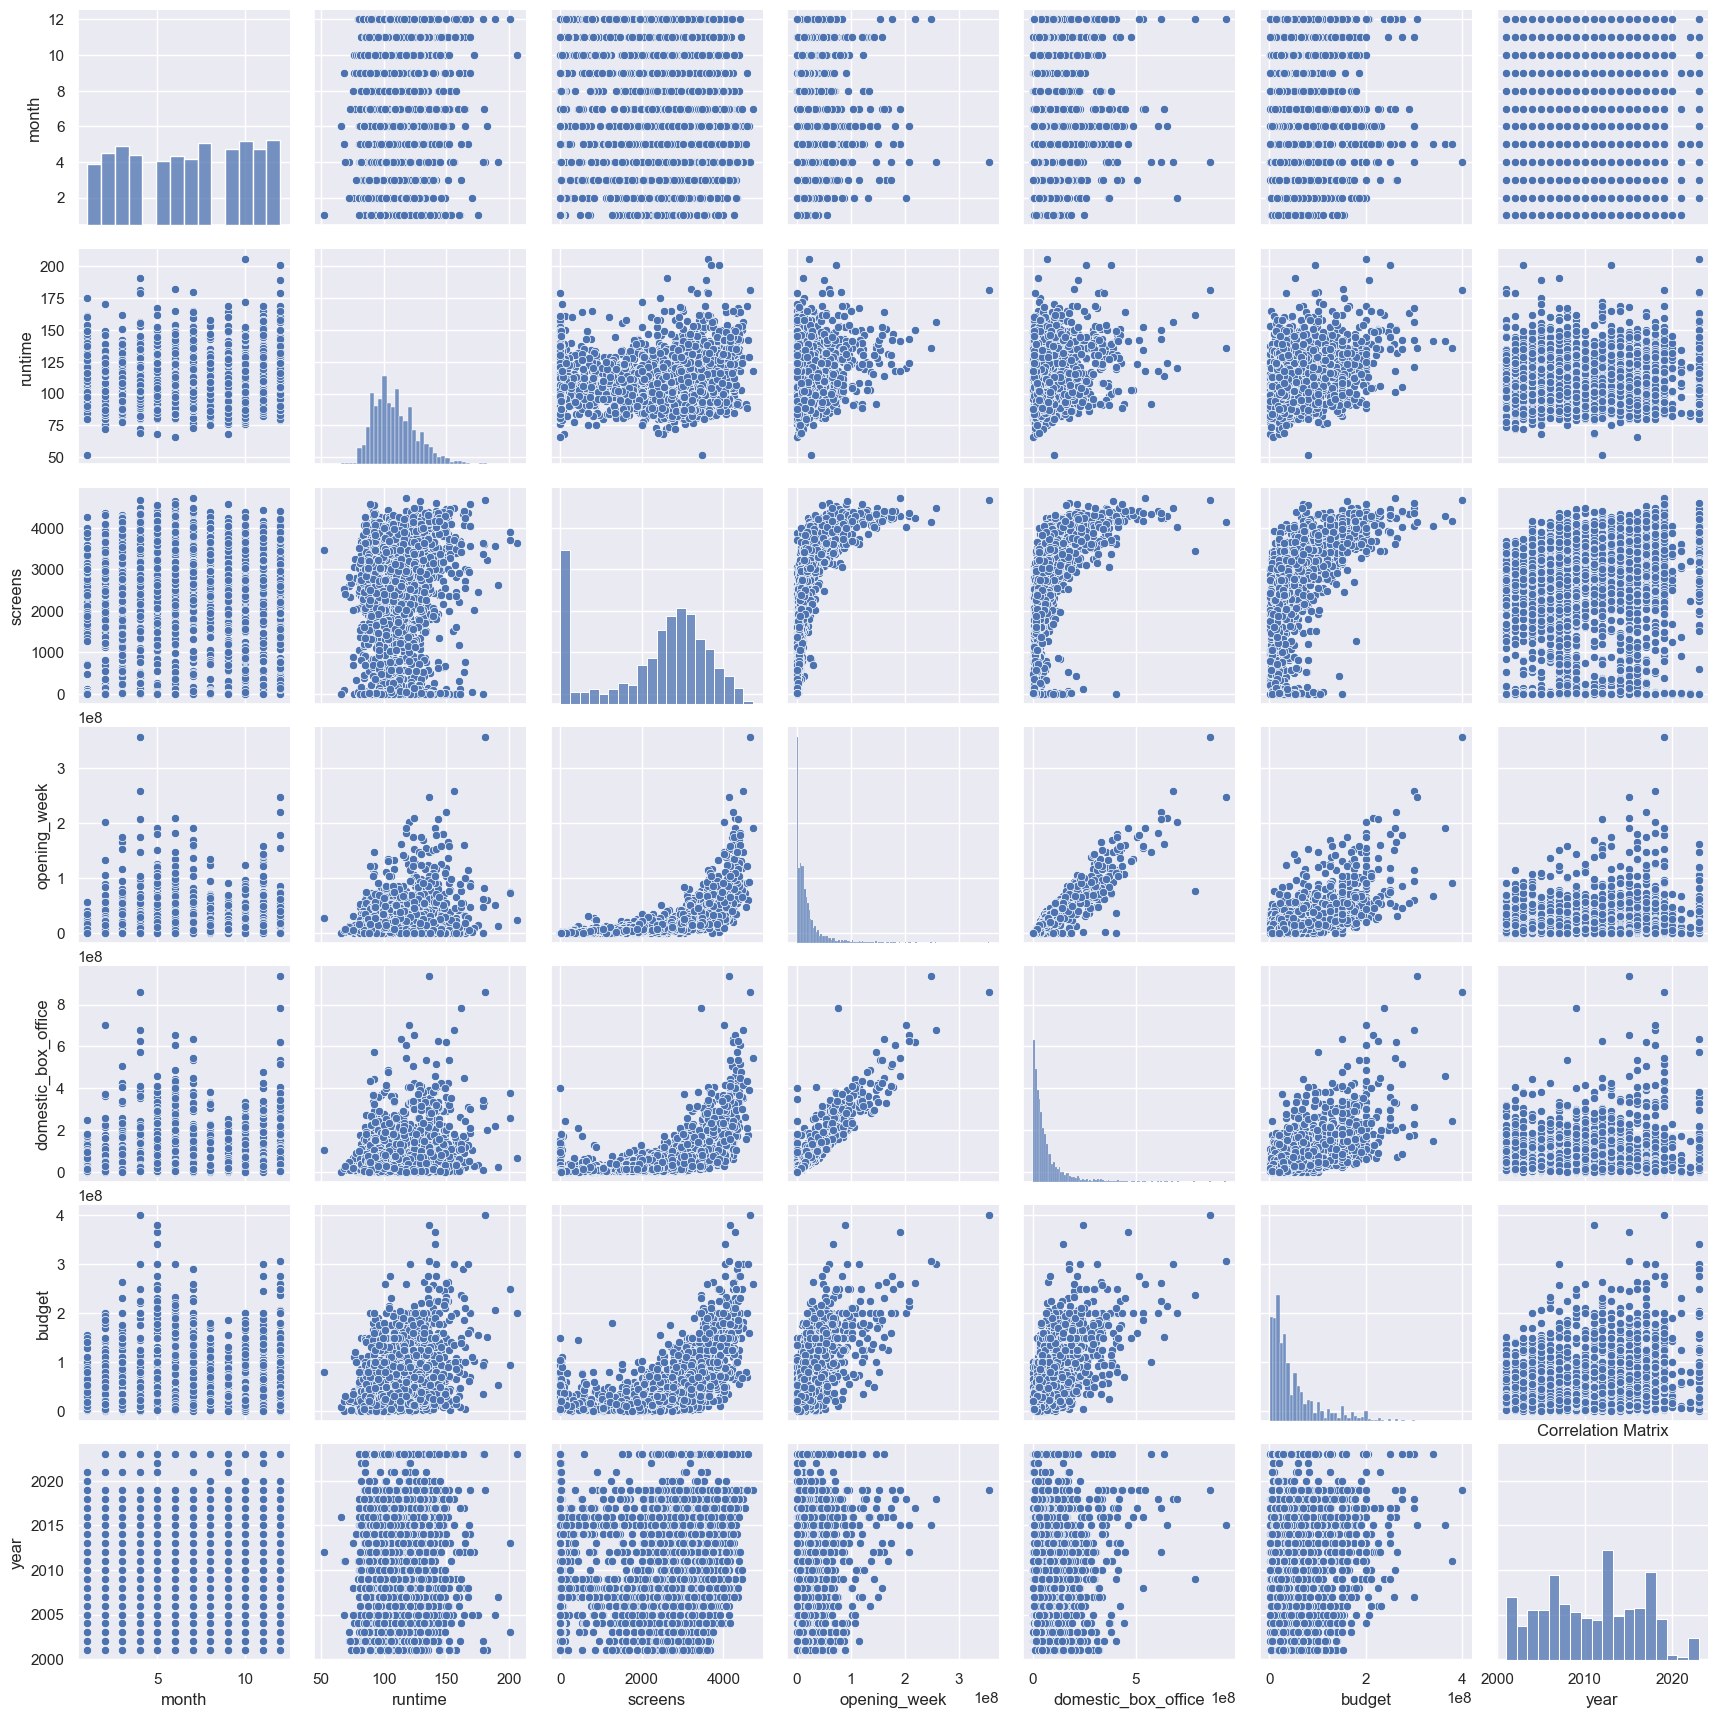

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.pairplot(df[columns])
plt.title("Correlation Matrix")
plt.show()

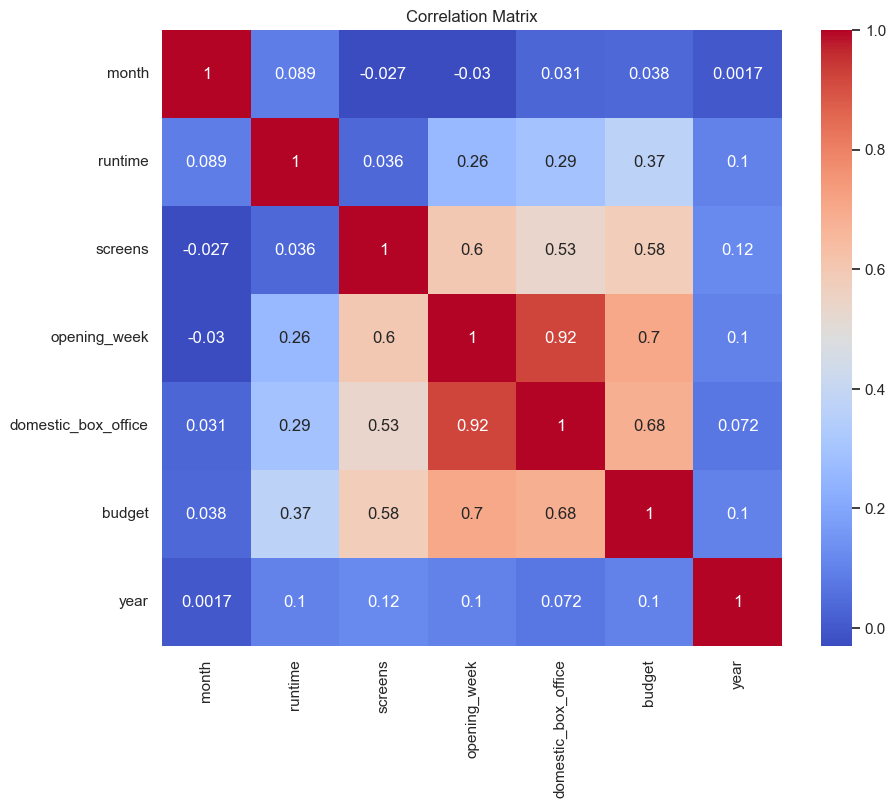

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

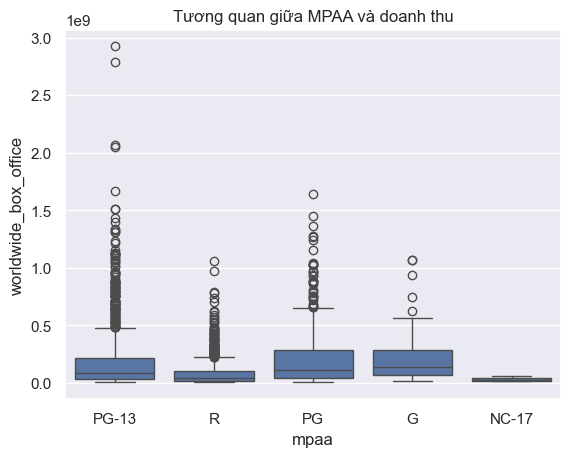

In [50]:
sns.boxplot(x="mpaa", y="worldwide_box_office", data=df)

# Đặt tiêu đề cho biểu đồ
plt.title("Tương quan giữa MPAA và doanh thu")

# Hiển thị biểu đồ
plt.show()